# Importing The Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Dataset

In [2]:
df = pd.read_csv(r"C:\Users\itsso\Downloads\HouseData\data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Preprocessing

In [3]:
# Drop any missing values
df.dropna(inplace=True)

# Convert categorical to numerical variables
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(pd.Categorical)
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.timestamp())
df.head()

X = df.drop(['price'], axis=1) 
y = df['price']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training The Models

In [4]:
# Linear Regression
lr= LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Gradient Boosting Regressor 
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

# Testing The Models

In [5]:
# Evaluate the models
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
gb_pred = gb.predict(X_test)

model = ['LinearRegression','RandomForestRegression','DecisionTreeRegression','GradientBoostingRegression']
mse = [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, rf_pred), mean_squared_error(y_test, dt_pred), mean_squared_error(y_test, gb_pred)]

result = pd.DataFrame({
    "Model":model,
    "MSE":mse
})

result

,Model,MSE
0,LinearRegression,9.862908e+11
1,RandomForestRegression,9.750001e+11
2,DecisionTreeRegression,1.022649e+12
3,GradientBoostingRegression,9.679198e+11


# Histogram of Actual House Prices

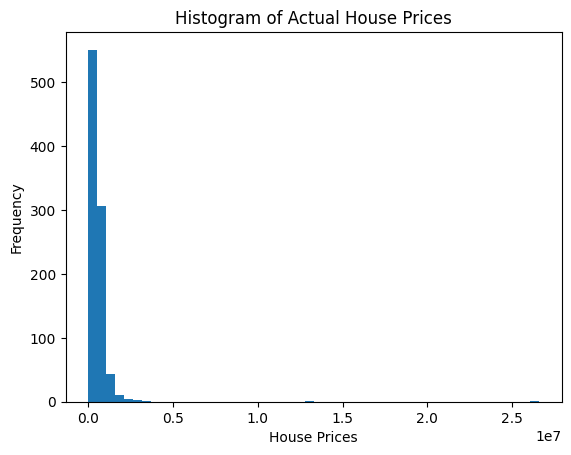

In [6]:
plt.hist(y_test, bins=50)
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.title("Histogram of Actual House Prices")
plt.show()

# Histogram of Predicted House Prices

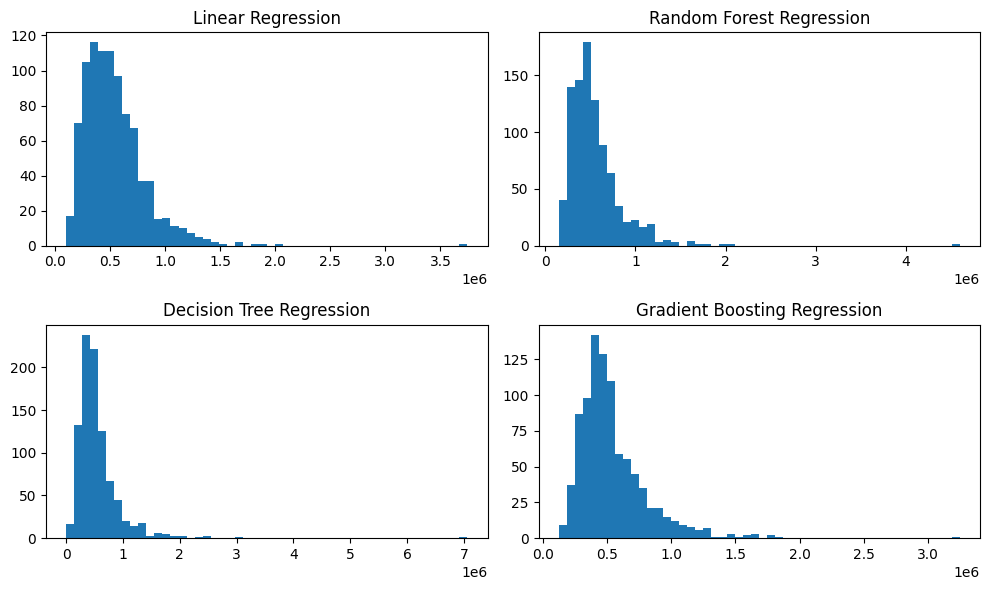

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(lr_pred, bins=50)
plt.title("Linear Regression")
plt.subplot(2, 2, 2)
plt.hist(rf_pred, bins=50)
plt.title("Random Forest Regression")
plt.subplot(2, 2, 3)
plt.hist(dt_pred, bins=50)
plt.title("Decision Tree Regression")
plt.subplot(2, 2, 4)
plt.hist(gb_pred, bins=50)
plt.title("Gradient Boosting Regression")
plt.tight_layout()
plt.show()

# Actual vs Predicted House Prices

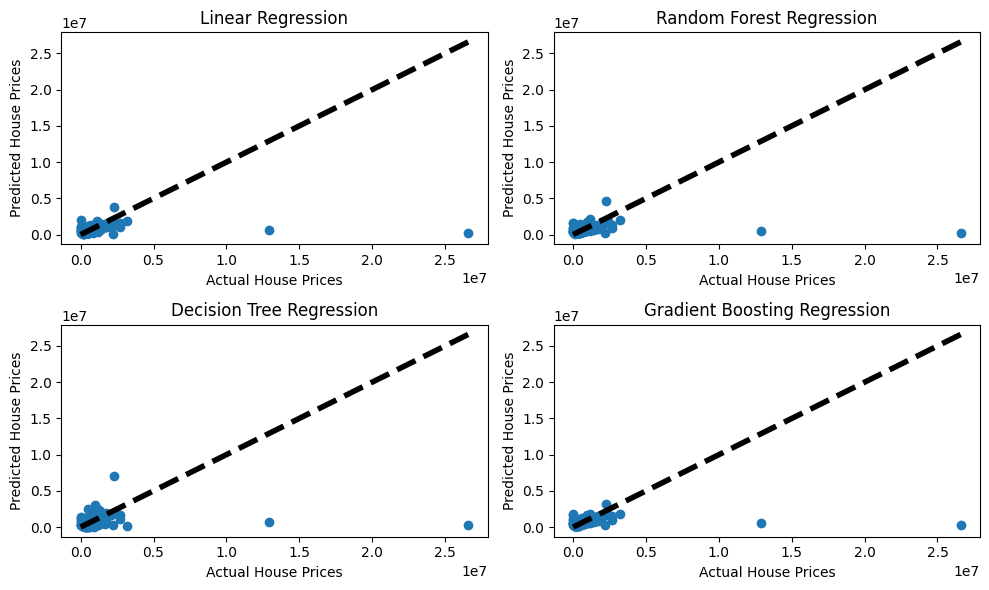

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.subplot(2, 2, 2)
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Random Forest Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.subplot(2, 2, 3)
plt.scatter(y_test, dt_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Decision Tree Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.subplot(2, 2, 4)
plt.scatter(y_test, gb_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Gradient Boosting Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.tight_layout()
plt.show()